In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# DL Cifar-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# print the size
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])

# convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_testonehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

170498071/170498071 [==============================] - 16s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

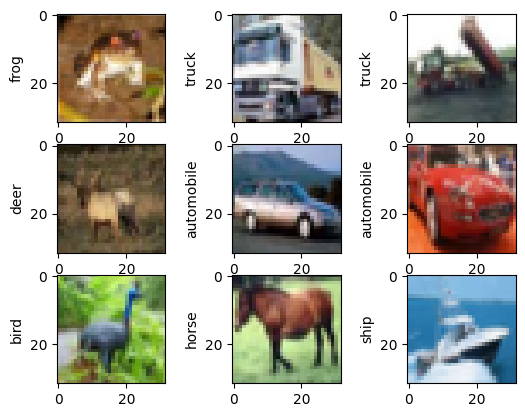

In [5]:
# Create an image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
# Show the first 9 images and their labels
plt.figure()
for i in range(9):
    # create a figure with 9 subplots
    plt.subplot(3,3,i+1)
    # show an image
    plt.imshow(x_train[i])
    # show the label
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [6]:
# pixel normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [37]:
# Model Creation
def CNN_classification_model(input_size=x_train.shape[1:]):
    model = Sequential()
    # the first block with 2 convolutional layers and 1 maxpooling layer
    '''Conv1 with 32 3*3 kernels
    padding="same": it applies zero padding to the input image so that the input image gets
    fully covered by the filter and specified stride.
    It is called SAME because, for stride 1, the output will be the same as the input.
    output: 32*32*32'''
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    # ReLU activation function
    model.add(Activation('relu'))
    # 2nd Conv layer
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    # maxpooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=1))

    # 2nd block
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    # maxpooling the default strides = 1
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Before sending a feature map into a fully connected network, it should be flattened into a column vector
    model.add(Flatten())
    # fully connected layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    # dropout layer every neuron is set to 0 with a prob of .25
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    # map the score of each class into probability
    model.add(Activation('softmax'))

    opt = keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = CNN_classification_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 29, 29, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        18496     
                                                      

In [38]:
# Model Training
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

# load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name=True)
# train
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6472 - accuracy: 0.4006
Epoch 1: loss improved from inf to 1.64716, saving model to final_cifar10.h5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6472 - accuracy: 0.4006
Epoch 2/10


E:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - ETA: 0s - loss: 1.3122 - accuracy: 0.5335
Epoch 2: loss improved from 1.64716 to 1.31221, saving model to final_cifar10.h5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.3122 - accuracy: 0.5335
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1706 - accuracy: 0.5921
Epoch 3: loss improved from 1.31221 to 1.17059, saving model to final_cifar10.h5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.1706 - accuracy: 0.5921
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0616 - accuracy: 0.6289
Epoch 4: loss improved from 1.17059 to 1.06160, saving model to final_cifar10.h5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0616 - accuracy: 0.6289
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.9750 - accuracy: 0.6620
Epoch 5: loss improved from 1.06160 to 0.97505, saving model to final_cifar10.h5
1563/1563 [==

In [39]:
# Model Evaluation
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.8056 - accuracy: 0.7238


[0.8055511713027954, 0.723800003528595]

In [42]:
# Predict on single image
# output the possibility of each class
new_model.predict(x_test[0:1])

1/1 [==============================] - 0s 17ms/step


array([[4.3432563e-04, 3.4188529e-04, 5.9112771e-03, 5.6522793e-01,
        1.3774995e-03, 4.0068549e-01, 2.2611262e-02, 6.7654048e-04,
        2.2910261e-03, 4.4276565e-04]], dtype=float32)

In [43]:
# output the predicted label
prediction = new_model.predict(x_test[0:1])
predicted_label = np.argmax(prediction, axis=-1)
print("Predicted Class Label:", predicted_label)

1/1 [==============================] - 0s 35ms/step
Predicted Class Label: [3]


In [2]:
# plot the first 4 images in the test set and their corresponding predicted labels
# label list
pred_list = []

plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    # plot
    plt.imshow(x_test[i])
    # predict
    pred = new_model.predict(x_test[0:10])
    pred_label = pred.argmax(axis=1)
    pred_list.append(pred_label)
    # Display actual and predicted labels of images
    plt.title("pred:"+category_dict[pred_label[i]]+"    actual:"+category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()

NameError: name 'plt' is not defined